In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from tqdm import tqdm
import seaborn as sns

import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import pandas as pd

N = 20001

fname = f'Jaffe_{N-1}_out_perturber.txt'

M = 1
m = M/N
Rs = 1
M_p = M/10

rho_0 = M / (4 * np.pi * (Rs)**3)

# Fetch Data

In [2]:
data = pd.read_csv(fname, names=list(range(7)), sep = ' ')
datas = np.array(data)

In [3]:
def dati (data,N,M_tot,M_p):

    x = []
    y = []
    z = []
    
    v_x = []
    v_y = []
    v_z = []
    
    start = N + 3
    step  = N * 3 + 3
    
    a = (np.array([data.iloc[i::step,:].copy() for i in range(start,start+N)]))
    for j in range(len(a)):
        temp = np.array([a[j][i][~np.isnan(a[j][i])] for i in range(len(a[j]))])
        
        x.append(temp[:,0])
        y.append(temp[:,1])
        z.append(temp[:,2])
        
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)
    
    
    b = (np.array([data.iloc[i::step,:].copy() for i in range(start+N,start+(N)*2)]))
    
    for j in range(len(b)):
        temp = np.array([b[j][i][~np.isnan(b[j][i])] for i in range(len(b[j]))])
        
        v_x.append(temp[:,0])
        v_y.append(temp[:,1])
        v_z.append(temp[:,2])
     

    v_x = np.array(v_x)
    v_y = np.array(v_y)
    v_z = np.array(v_z)
    
    #cm
    cm_x = []
    cm_y = []
    cm_z = []
    
    # Centro di Massa del sistema di 20000 particelle uso mean e median
    cm_x.append(np.median(x[1:], axis=0))
    cm_y.append(np.median(y[1:], axis=0))
    cm_z.append(np.median(z[1:], axis=0))

    cm_x = np.array(cm_x[0])
    cm_y = np.array(cm_y[0])
    cm_z = np.array(cm_z[0])

    print('The initial center of mass is (', cm_x[0],', ', cm_y[0],', ', cm_z[0], ')')  
    print('The final center of mass is (', cm_x[-1],', ', cm_y[-1],', ', cm_z[-1], ')')
            
    cm_v_x = []
    cm_v_y = []
    cm_v_z = []        
        
    # Velocità del centro di massa Jaffe
    cm_v_x.append(np.median(v_x[1:], axis=0))
    cm_v_y.append(np.median(v_y[1:], axis=0))
    cm_v_z.append(np.median(v_z[1:], axis=0))

    cm_v_x = np.array(cm_v_x[0])
    cm_v_y = np.array(cm_v_y[0])
    cm_v_z = np.array(cm_v_z[0])
        
    
    r    = np.array([(x[i]**2+y[i]**2+z[i]**2)**0.5 for i in range(N)])
    cm_r = np.array([(cm_x[i]**2+cm_y[i]**2+cm_z[i]**2)**0.5 for i in range(len(cm_x))])
    
    
    t = (np.array(data.iloc[2::step,:].copy()))[:,2]
    
    return x,y,z,cm_x, cm_y, cm_z,v_x,v_y,v_z,cm_v_x,cm_v_y,cm_v_z,r,cm_r,t

In [4]:
x,y,z,cm_x,cm_y,cm_z,v_x,v_y,v_z,cm_vx,cm_vy,cm_vz,r,r_cm,time = dati(data, N, M, M_p)

The initial center of mass is ( -6.389753799999999e-05 ,  0.0021945032 ,  2.5920777049999997e-05 )
The final center of mass is ( -0.0085379919 ,  1.905427 ,  0.020803157500000002 )


Let's see how de distribution of particles and the position of the perturber evolves with time (projected on one plane)

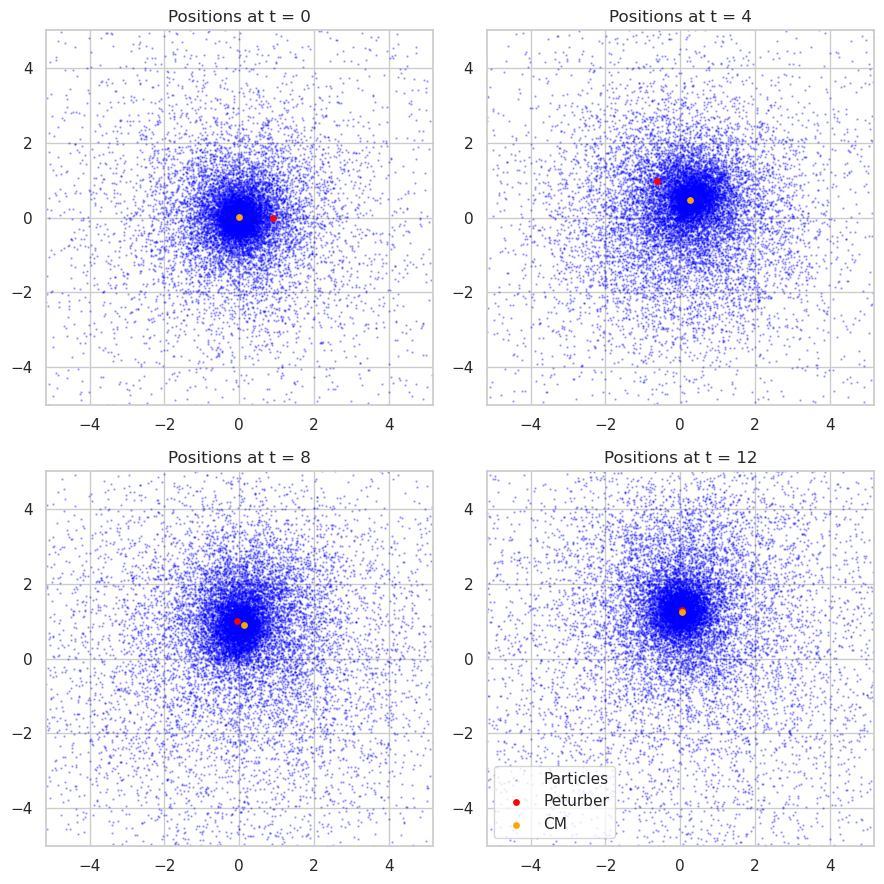

In [83]:
t0  = 0
t1 = int(np.round(len(time) * 1 / 5))
t2 = int(np.round(len(time) * 2 / 5))
t3 = int(np.round(len(time) * 3 / 5))

# Set Seaborn style
sns.set(style='whitegrid')

fig, ax = plt.subplots(2, 2, tight_layout=True, figsize=(9,9))

# Plot 1
ax[0][0].scatter(x[1:, t0], y[1:, t0], c='blue', alpha=0.3, s=0.5, label='Particles')
ax[0][0].scatter(x[0][t0], y[0][t0], c='red', alpha=1, s=15, label='Peturber')
ax[0][0].scatter(cm_x[t0], cm_y[t0], c='orange', alpha=1, s=15, label='CM')
ax[0][0].set_title(f'Positions at t = {int(np.round(time[t0]))}')
ax[0][0].axis('equal')
#ax[0][0].legend(fontsize='large')
ax[0][0].set_xlim(-5, 5)
ax[0][0].set_ylim(-5, 5)


# Plot 2
ax[0][1].scatter(x[1:, t1], y[1:, t1], c='blue', alpha=0.3, s=0.5, label='Particles')
ax[0][1].scatter(x[0][t1], y[0][t1], c='red', alpha=1, s=15, label='Peturber')
ax[0][1].scatter(cm_x[t1], cm_y[t1], c='orange', alpha=1, s=15, label='CM')
ax[0][1].set_title(f'Positions at t = {int(np.round(time[t1]))}')
ax[0][1].axis('equal')
#ax[0][1].legend(fontsize='large')
ax[0][1].set_xlim(-5, 5)
ax[0][1].set_ylim(-5, 5)


# Plot 3
ax[1][0].scatter(x[1:, t2], y[1:, t2], c='blue', alpha=0.3, s=0.5, label='Particles')
ax[1][0].scatter(x[0][t2], y[0][t2], c='red', alpha=1, s=15, label='Peturber')
ax[1][0].scatter(cm_x[t2], cm_y[t2], c='orange', alpha=1, s=15, label='CM')
ax[1][0].set_title(f'Positions at t = {int(np.round(time[t2]))}')
ax[1][0].axis('equal')
#ax[1][0].legend(fontsize='large')
ax[1][0].set_xlim(-5, 5)
ax[1][0].set_ylim(-5, 5)

# Plot 4
ax[1][1].scatter(x[1:, t3], y[1:, t3], color='blue', alpha=0.3, s=0.5, label='Particles')
ax[1][1].scatter(x[0][t3], y[0][t3], c='red', alpha=1, s=15, label='Peturber')
ax[1][1].scatter(cm_x[t3], cm_y[t3], c='orange', alpha=1, s=15, label='CM')
ax[1][1].set_title(f'Positions at t = {int(np.round(time[t3]))}')
ax[1][1].axis('equal')
ax[1][1].legend()
ax[1][1].set_xlim(-5, 5)
ax[1][1].set_ylim(-5, 5)

plt.show()

## Radius of the perturber

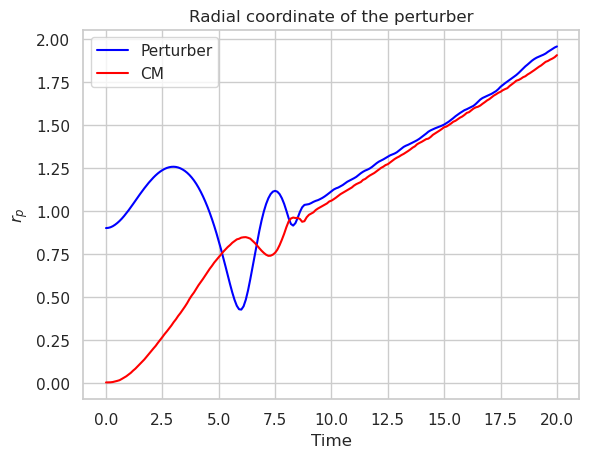

In [6]:
plt.plot(time, r[0], color='blue',label='Perturber')
plt.plot(time, r_cm, color='red', label='CM')
plt.xlabel('Time')
plt.ylabel(r'$r_p$')
plt.title('Radial coordinate of the perturber')
plt.legend()

### Let's compute the distance of the perturber from the center of mass of the distribution

Text(0.5, 1.0, 'Radial coordinate of the perturber with respect to the CM')

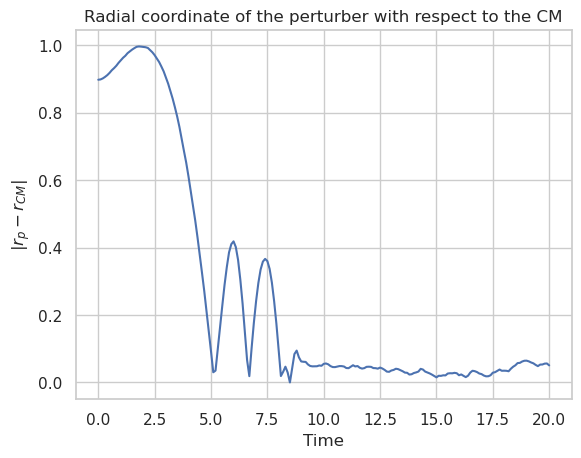

In [7]:
plt.plot(time, abs(r[0]-r_cm))
plt.xlabel('Time')
plt.ylabel(r'$|r_p-r_{CM}|$')
plt.title('Radial coordinate of the perturber with respect to the CM')

## Trajectory of the perturber

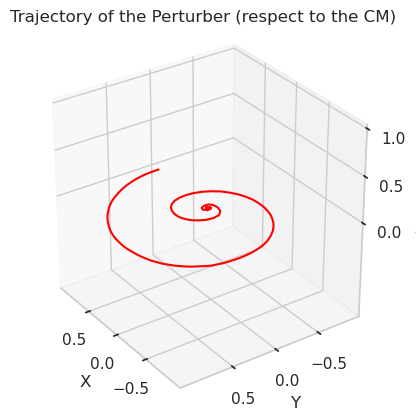

In [79]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(aspect='equal')
#ax.plot3D(x_1, y_1, z_1, 'blue')
ax.plot(x[0]-cm_x, y[0]-cm_y, z[0]-cm_z, 'red')
#plt.title('Two-Body Orbit')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xticks(np.arange(-0.5, 1.5, 0.5))
ax.set_yticks(np.arange(-1, 1, 0.5))
ax.set_zticks(np.arange(0, 2, 0.5))

neg = -1
pos = 1

ax.axes.set_xlim3d(left=x[0][-1]-cm_x[-1]-1, right=x[0][-1]-cm_x[-1]+1) 
ax.axes.set_ylim3d(bottom=y[0][-1]-cm_y[-1]-1, top=y[0][-1]-cm_y[-1]+1) 
ax.axes.set_zlim3d(bottom=z[0][-1]-cm_z[-1]-1, top=z[0][-1]-cm_z[-1]+1)


ax.view_init(30, 145)  # Changing viewing angle (adjust as needed)
#plt.savefig('dyf_3D.png')
plt.title('Trajectory of the Perturber (respect to the CM)')
plt.show()

Let's try to visualize the trajectory of the perturber on the x-y plane!

Text(0.5, 1.0, 'Projected Perturber Orbit')

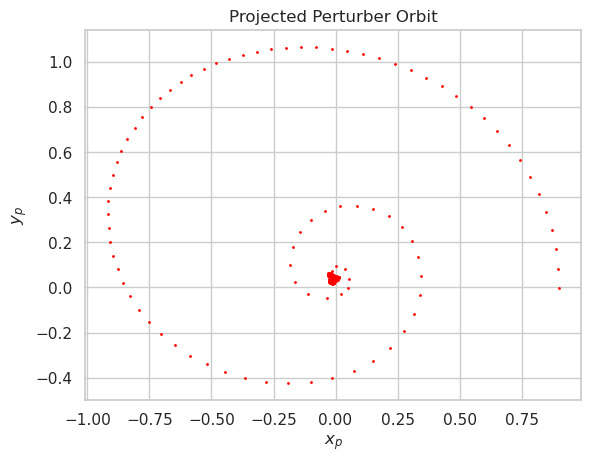

In [82]:
plt.scatter(x[0]-cm_x, y[0]-cm_y, marker='o', s=1, color='red')
plt.xlabel(r'$x_p$')
plt.ylabel(r'$y_p$')
plt.title('Projected Perturber Orbit')

In [10]:
ampiezze = np.sqrt((x[0]-cm_x)**2 + (y[0]-cm_y)**2)

Text(0, 0.5, 'Orbital Amplitude')

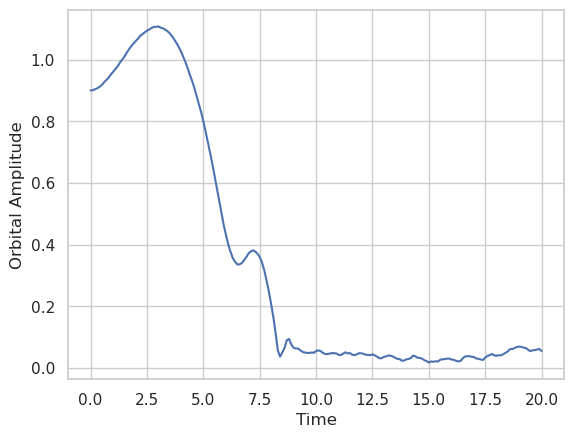

In [11]:
plt.plot(time, ampiezze)
plt.xlabel('Time')
plt.ylabel('Orbital Amplitude')

# Lagrangian Radii

100%|█████████████████████████████████████████████| 8/8 [00:01<00:00,  4.17it/s]


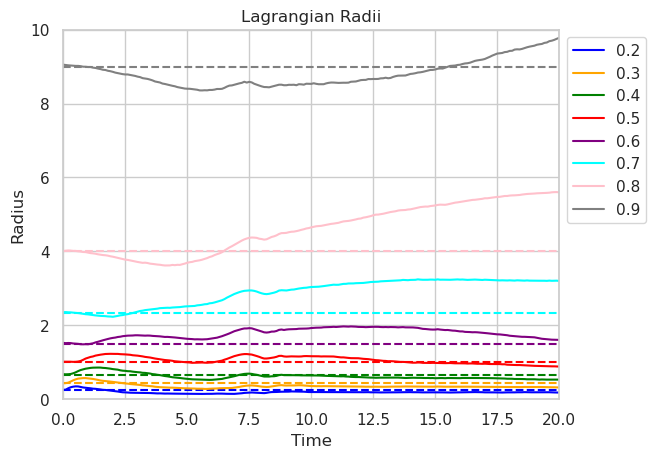

In [12]:
perc = [0.2,0.3,0.4,0.5,0.6,0.7, 0.8, 0.9]
colors = ['blue', 'orange', 'green', 'red', 'purple', 'cyan', 'pink', 'grey']

for p, c in tqdm(zip(perc, colors), total=len(perc)):
    r_L = []
    for i in range(len(time)):
        a    = np.sort(abs(r[1:,i]-r_cm[i]))
        mask = a<np.quantile(a,p)
        r_L.append(np.max(a[mask]))
    #Plot it
    r_L = np.array(r_L)
    R_teo = Rs * p / (1 - p)
    plt.plot(time,r_L, color=c, label=str(p))
    plt.axhline(y = R_teo, color=c, linestyle='--')


'''for i in range(0, N, 100):
    plt.plot(time,r[i], alpha=0.1)
'''
plt.ylim(0,10)
plt.xlim(0, np.max(time))
plt.xlabel('Time')
plt.ylabel('Radius')
plt.title('Lagrangian Radii')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.savefig(f'Plots/Lagrangian Radii {N} teo.png' )

In [87]:
velocities = np.sqrt(v_x**2 + v_y**2 + v_z**2)

Text(0.5, 1.0, 'Perturber velocity')

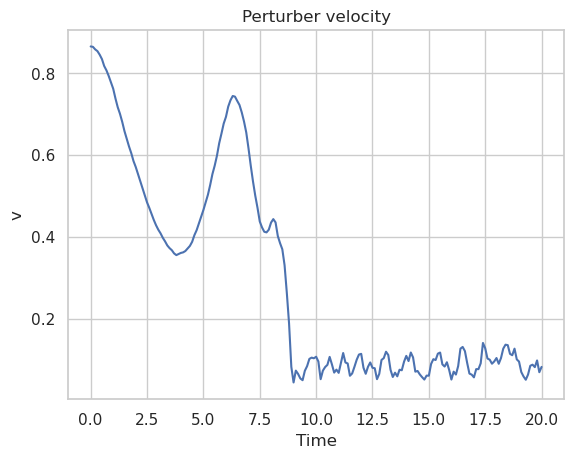

In [91]:
plt.plot(time, velocities[0])
plt.xlabel('Time')
plt.ylabel('v')
plt.title('Perturber velocity')

In [111]:
times_indexes = [0, 75, 125, 200]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

In [112]:
for index, color in times_indexes,colors:
    plt.hist(velocities[1:, index], bins=100, histtype='step', density='True', color=color, label=f't = {time[index]}', alpha=0.5)

plt.title('Velocities Distribution')
plt.legend()

ValueError: too many values to unpack (expected 2)

# Energy

In [55]:
from scipy import linalg

In [56]:
energy_file = f'Jaffe_log_perturber_{N-1}.txt'

In [57]:
en_data = pd.read_csv(energy_file, header=None).to_numpy()
datas   = pd.read_csv(energy_file, header=None)
en_data.shape

(80208, 1)

In [58]:
datas

,0
0,Hierarchical N-body code (theta scan)
1,nbody dtime eps theta usequ...
2,20001 0.00100 0.0075 0.20 fal...
3,\t rsize tdepth ftree actmax nbbtot ...
4,\t131072.0 31 3.047 21667 132332067 ...
...,...
80203,\t rsize tdepth ftree actmax nbbtot ...
80204,\t131072.0 25 3.049 20884 124323701 ...
80205,time |T+U| T -U -T/U ...
80206,20.001 0.18732 0.20906 0.39638 0.52743 0...


In [59]:
####### remove some lines from the dataset###########
# Prento tutte le righe che contengono la parola 'time' e prendo la riga successiva
raws_to_keep = []

for i in range(0, len(en_data)):
    if '|T+U|' in en_data[i][0]:
        raws_to_keep.append(i+1)

raws_to_keep = np.array(raws_to_keep)

In [60]:
raws_to_keep

array([    6,    11,    15, ..., 80198, 80202, 80206])

In [61]:
en_data[5], en_data[6]

(array(['        time   |T+U|       T      -U    -T/U  |Vcom|  |Jtot|  CPUtot'],
       dtype=object),
 array(['       0.000 0.18732 0.36802 0.55534 0.66270 0.07450 0.09038   0.046'],
       dtype=object))

In [62]:
good_data = []
for index in raws_to_keep:
    good_data.append(en_data[index])

good_data = np.array(good_data)

In [64]:
good_data[8907][0]

'  8.907 0.18729 0.20975 0.39704 0.52829 0.07450 0.09038 135.169'

In [65]:
times_energy = []
kinetic = []
potential = []

for i in range (0, len(good_data)):
    if i == 8907:
        times_energy.append(float(good_data[i][0][1:7]))
        kinetic.append(float(good_data[i][0][16:23]))
        potential.append(float(good_data[i][0][25:31]))
    else:
        times_energy.append(float(good_data[i][0][0:12]))
        kinetic.append(float(good_data[i][0][21:28]))
        potential.append(float(good_data[i][0][30:36]))
                    

en_times = np.array(times_energy)
T = np.array(kinetic)
U = np.array(potential)*-1
E_tot = T + U

E_med = np.average(E_tot)
E_stdev = np.std(E_tot)

In [66]:
en_times

array([0.0000e+00, 1.0000e-03, 2.0000e-03, ..., 1.9999e+01, 2.0000e+01,
       2.0001e+01])

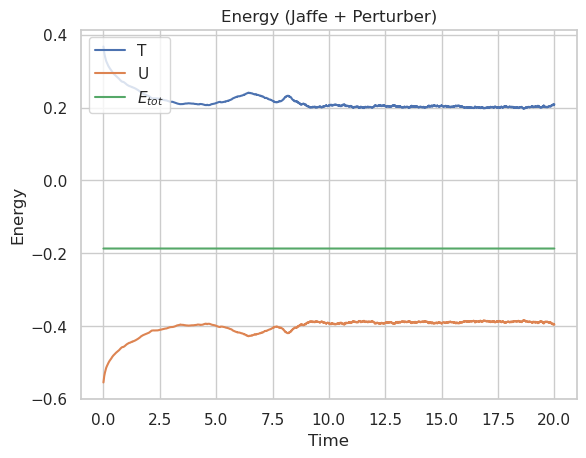

In [67]:
plt.plot(en_times, T, label='T')
plt.plot(en_times, U, label='U')
plt.plot(en_times, E_tot, label=r'$E_{tot}$')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy (Jaffe + Perturber)')

plt.legend()

In [74]:
print('Mean energy: ', np.mean(E_tot))
print('Rel. error:  ', np.std(E_tot)/np.mean(E_tot))

Mean energy:  -0.1872906239688015
Rel. error:   -5.191649335035012e-05


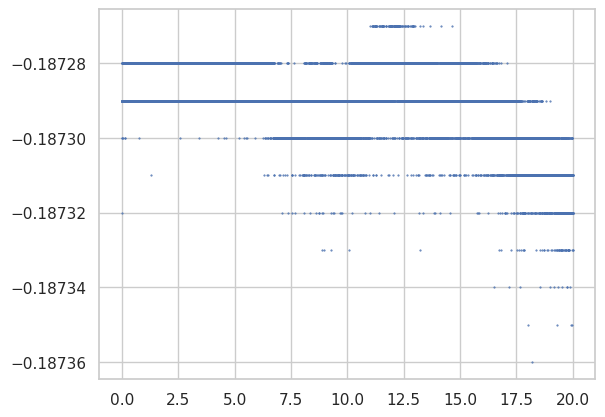

In [75]:
plt.scatter(en_times, E_tot, marker='.', s=1)

# Animation

  0%|          | 0/200 [00:00<?, ?it/s]

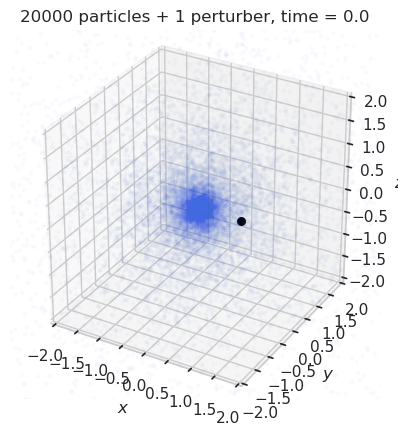

In [76]:
from matplotlib import animation
from tqdm.notebook import tqdm
from IPython.display import HTML

plt.rcParams['animation.embed_limit'] = 100.0  # Imposta il limite a 50 MB o a un valore più grande se necessario

def update(num):
    global N    #N_particles
    l = 2
    ax.clear()
    
    ax.scatter(x[1:,num], y[1:,num], z[1:,num], color = 'royalblue', s = 5 ,alpha = .02)        # Updating Point Location
    ax.scatter(x[0,num], y[0,num], z[0,num], color = 'black', s = 30)
    
    ax.set_title(f'{N-1} particles + 1 perturber, time = {round(time[num],1)}')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    
    ax.set_xlim(-l, l)
    ax.set_ylim(-l, l)
    ax.set_zlim(-l, l)
    

## Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(aspect='equal')
line_ani = animation.FuncAnimation(fig, update, interval=50,   
                                   frames=tqdm(range(len(time) - 1)));

HTML(line_ani.to_jshtml())
line_ani.save(f'Jaffe_{N-1}_perturber.gif')